In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Загрузка данных
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)

In [3]:
# Выбор нужных столбцов
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']
df = df.loc[:, columns]
df.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
5,4,4.50,5420,101930,1.0,1225000.0
6,3,2.25,1715,6819,2.0,257500.0
7,3,1.50,1060,9711,1.0,291850.0
8,3,1.00,1780,7470,1.0,229500.0
9,3,2.50,1890,6560,2.0,323000.0


In [4]:
# Разделение на признаки (X) и целевую переменную (y)
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
X = df.loc[:, features]  # Матрица признаков
y = df.loc[:, ['price']]  # Целевая переменная (цена)

# Разделение данных на обучающую и тестовую выборки (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=.75)

# Создание и обучение модели регрессионного дерева с глубиной 2
reg = DecisionTreeRegressor(max_depth=2, random_state=0)
reg.fit(X_train, y_train)

# Предсказание цен для первых 10 тестовых объектов
reg.predict(X_test[0:10])

# Предсказание цены для одного объекта
reg.predict(X_test.iloc[0].values.reshape(1,-1))

# Оценка модели с помощью R² (коэффициент детерминации)
score = reg.score(X_test, y_test)
print(score)  # Выводит R² score

0.4380405655348807


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [5]:
# Поиск оптимальной глубины дерева
max_depth_range = list(range(1, 25))
r2_list = []

# Перебор разных значений глубины дерева
for depth in max_depth_range:
    reg = DecisionTreeRegressor(max_depth=depth, random_state=0)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    r2_list.append(score)

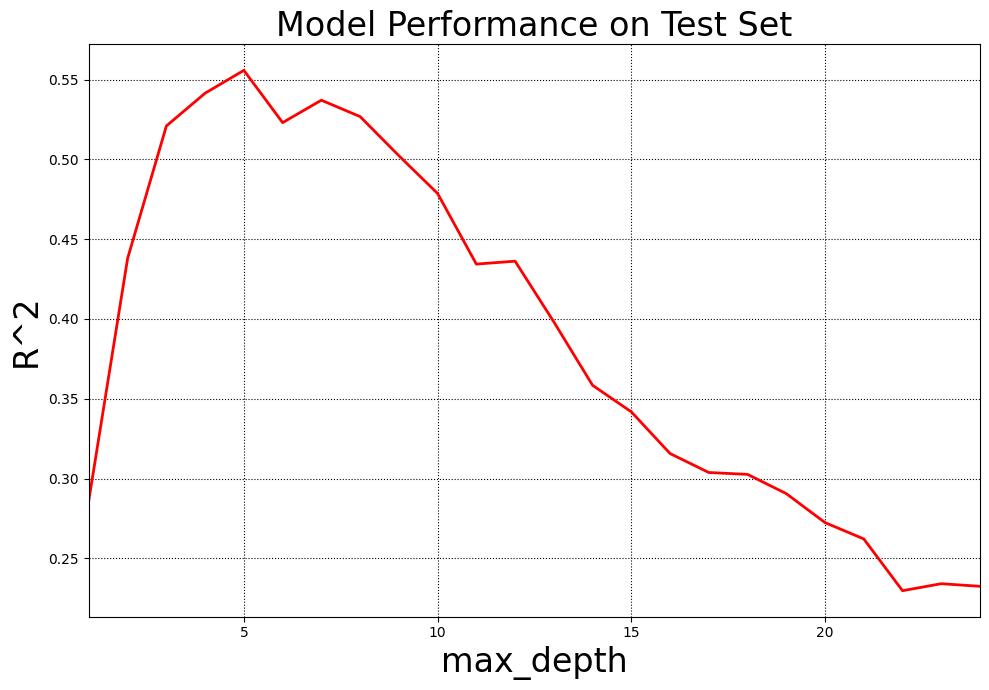

In [6]:
# Построение графика зависимости R² от глубины дерева
fig, ax = plt.subplots(figsize=(10,7), facecolor='white')
ax.plot(max_depth_range, r2_list, lw=2, color='r')
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True, axis='both', linestyle=':', color='k')
ax.set_xlabel('max_depth', fontsize=24)
ax.set_ylabel('R^2', fontsize=24)
ax.set_title('Model Performance on Test Set', fontsize=24)
fig.tight_layout()

In [7]:
# Сравнение производительности на обучающей и тестовой выборках
r2_test_list = []
r2_train_list = []

for depth in max_depth_range:
    reg = DecisionTreeRegressor(max_depth=depth, random_state=0)
    reg.fit(X_train, y_train)

    # Оценка на тестовой выборке
    r2_test_list.append(reg.score(X_test, y_test))
    # Оценка на обучающей выборке (может привести к переобучению)
    r2_train_list.append(reg.score(X_train, y_train))

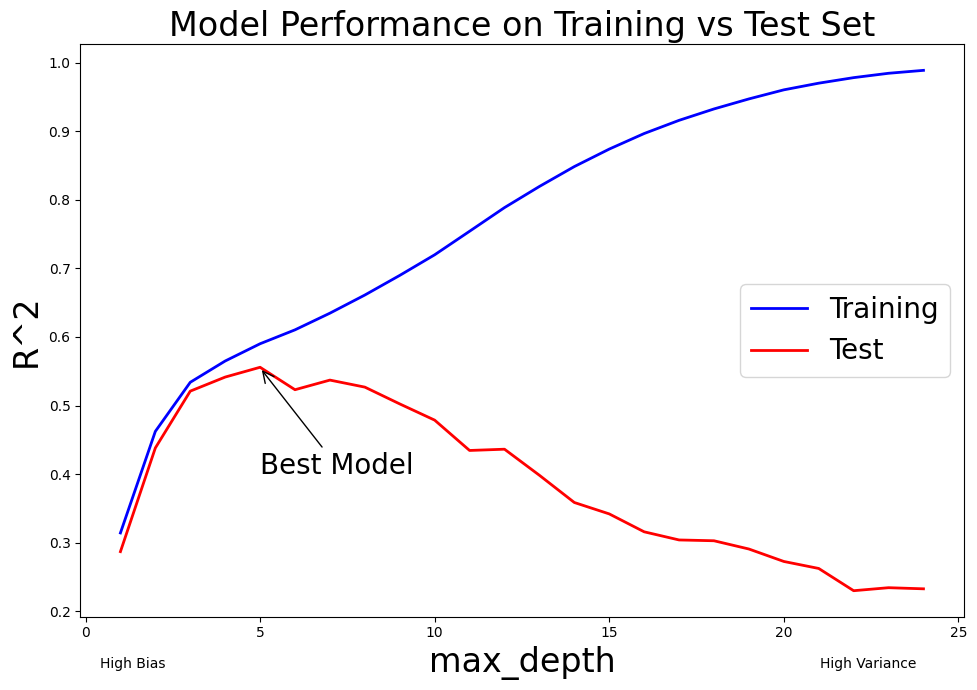

In [8]:
# Построение графиков для анализа bias-variance tradeoff
fig, ax = plt.subplots(figsize=(10,7), facecolor='white')
ax.plot(max_depth_range, r2_train_list, lw=2, color='b', label='Training')
ax.plot(max_depth_range, r2_test_list, lw=2, color='r', label='Test')
ax.set_xlabel('max_depth', fontsize=24)
ax.set_ylabel('R^2', fontsize=24)
ax.legend(loc='center right', fontsize=20)
ax.set_title('Model Performance on Training vs Test Set', fontsize=24)

# Аннотации для анализа
ax.annotate("Best Model", xy=(5, 0.555), xytext=(5, 0.4),
            arrowprops=dict(arrowstyle="->"), size=20)
ax.annotate('High Bias', xy=(.1, .032), xycoords='figure fraction')
ax.annotate('High Variance', xy=(.82, .032), xycoords='figure fraction')

fig.tight_layout()